# KEN3450, Data Analysis, Spring 2020 

## Clinic 1: EDA of Movies 

**Hristo Minkov - i6161227**

**Check the honor policy code posted on the portal before reusing code you found online**

---

# Table of Contents 
<ol start="0">
<li> Learning Goals & Deliverables </li>
<li> Loading and Cleaning with Pandas</li>
<li> Asking Questions?  </li>
<li> EDA  </li>
<li> Basic associations  </li>
<li> Determining the Most Successful Movies </li>
<li> Trends in Popularity of Genres </li>
<li> Conclusions
</ol>

## Learning Goals

About 10000 movies were fetched and parsed from [Rotten Tomatoes](https://www.rottentomatoes.com/) website. The "bestness" of these books came from a proprietary formula used by Goodreads and published as a list on their web site.

Scrapping the data from the website, lead to a tabular format info file presented here as a CSV file. In this clinic we'll clean and further parse the data.  We'll then do some exploratory data analysis to answer questions about these best books and popular genres.  

By the end of this clinic, you should be able to:

- Load and systematically address missing values, encoded as `NaN` values in our data set, for example, by removing observations associated with these values.
- Parse columns in the dataframe to create new dataframe columns.
- Create and interpret visualizations to explore the data set

Use your notebook to add any comments, results, code, etc. In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook. You are asked to deliver **only your notebook file, .ipnyb** and nothing else. Enjoy!

### Basic EDA workflow

(Already discussed, repeated here).

The basic workflow is as follows:

1. **Build** a DataFrame from the data (ideally, put all data in this object)
2. **Clean** the DataFrame. It should have the following properties:
    - Each row describes a single object
    - Each column describes a property of that object
    - Columns are numeric whenever appropriate
    - Columns contain atomic properties that cannot be further decomposed
3. Explore **global properties**. Use histograms, scatter plots, and aggregation functions to summarize the data.
4. Explore **group properties**. Use groupby and small multiples to compare subsets of the data.

This process transforms your data into a format which is easier to work with, gives you a basic overview of the data's properties, and likely generates several questions for you to followup in subsequent analysis.

## Part 1: Loading and Cleaning with Pandas 
Read in the `movies.csv` file, examine the data, and do any necessary data cleaning.

Here is a description of the columns (in order) present in this csv file:

```
id: a unique identifier for each movie
title: the title of the movie
cast: name of most recognizeable cast members seperated by a "|"
director: name of the director (if more than one, different names seperated by a "|"
runtime: duration of movie in min.
genres: categories of the movie seperated by a "|"
release_date: exact date of the release in the format MM/DD/YY or MM/DD/YYYY
users_voted: how many users have cast their vote for this movie
rating: average rating for the movie (scale 0-5)
release_year: the year of release
budget: production costs in US dollars
revenue: revenue income in US dollars
```

Report all the issues you found with the data and how you resolved them.  


----

Load the appropriate libraries

In [107]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

### Cleaning: Reading in the data
We read in and clean the data from `movies.csv`.  Try directly loading the data from file and see what the dataframe look like. What's the problem with naively loading the data as is? You might want to open the CSV file in Excel or your favorite text editor to see how this dataset is formatted.

In [108]:
#Read the data into a dataframe
df = pd.read_csv("movies.csv")

#Examine the first couple of rows of the dataframe
df.head(10)

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09/2015,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,04/01/2015,2947,3.65,2015,190000000,1506249360
5,281957,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25/15,3929,3.60,2015,135000000,532950503
6,87101,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,2.90,2015,155000000,440603537
7,286217,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,9/30/15,4572,3.80,2015,108000000,595380321
8,211672,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,6/17/15,2893,3.25,2015,74000000,1156730962
9,150540,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,06/09/2015,3935,4.00,2015,175000000,853708609


Lets read the csv file and add custom column descriptions specified in the problem statement. Check the documentation of `read_csv` to see how you can do that.

## Answer:
All column names are sufficiently descriptive. Therefore, there is no need to rename any column. One obvious issue in the data is that the release date is in different formats (MM/DD/YY or MM/DD/YYYY). This might cause some problems, so we should reformat it later at the cleaning step. Another remark - there is data duplication: the information regarding the release_year can be inferred from the release_date column. There exist several solutions to the problem:
1. Leaving it as it is since the movies can easily be sorted by date and there is quick access to the release_year characteristic of the movie
2. Splitting the release_date data into 3 fields - release_day, release_month and release_year. However, sorting by release date would not be straightforward anymore.
3. The best solution that I would choose is to remove the release year information in the release_date column. Then, we can sort the data points easier by first sorting the release_year and following - the release_date. Using this technique, we will get rid of the data duplication and the wrong date format of the release_date column at the same time.

### Cleaning: Examing the dataframe - quick checks

We should examine the dataframe to get a overall sense of the content. 

In [109]:
#Start by check the column data types, do they correspond to what they should be
#e.g. quantitative variables that are not quantitative, etc.)

print('Column types of the dataframe:\n')
print(df.dtypes)

Column types of the dataframe:

id                int64
title            object
cast             object
director         object
runtime           int64
genres           object
release_date     object
users_voted       int64
rating          float64
release_year      int64
budget            int64
revenue           int64
dtype: object


## Answer:
All columns appear to have the correct data types.

Do a couple more quick sanity checks to perform on the dataframe.

In [110]:
#Come up with a few other important properties of the dataframe to check
#e.g. check the dimensions?

print('Dataframe size:')
print(df.size)

print('\nDataframe dimensions:')
print(df.shape)

print('\nDataframe quantative variables statistics:')
print(df.describe())

Dataframe size:
130392

Dataframe dimensions:
(10866, 12)

Dataframe quantative variables statistics:
                  id       runtime   users_voted        rating  release_year        budget       revenue
count   10866.000000  10866.000000  10866.000000  10861.000000  10866.000000  1.086600e+04  1.086600e+04
mean    66064.177434    102.070863    217.389748      2.987386   2001.322658  1.462570e+07  3.982332e+07
std     92130.136561     31.381405    575.619058      0.467639     12.812941  3.091321e+07  1.170035e+08
min         5.000000      0.000000     10.000000      0.750000   1960.000000  0.000000e+00  0.000000e+00
25%     10596.250000     90.000000     17.000000      2.700000   1995.000000  0.000000e+00  0.000000e+00
50%     20669.000000     99.000000     38.000000      3.000000   2006.000000  0.000000e+00  0.000000e+00
75%     75610.000000    111.000000    145.750000      3.300000   2011.000000  1.500000e+07  2.400000e+07
max    417859.000000    900.000000   9767.000000      4.60

Was the data read correctly and values represented as we expected?

## Answer:
The data was read correctly and all the checks provide the correct information. Few notes however:
1. The runtime column seems to have several outliers as the min duration of the movie goes down to 0 and the max - 900. A 15 hour movie should be considered an outlier as well as the movie with no duration.
2. Good thing to note here is that the dataframe contains plenty of movies between 1960 and 2015, so we should not expect a film outside this period.
3. The budget and revenue fields appear to have many 0s as values. We should substitute either remove the 0s from our further measurements and visualizations or substitute the 0s with the mean value for the respective column.

Either case, this segment is dedicated to the dataframe examination, so no further actions are executed yet.

### Cleaning: Examining the dataframe - a deeper look

Beyond performing checking some quick general properties of the data frame and looking at the first $n$ rows, we can dig a bit deeper into the values being stored. If you haven't already, check to see if there are any missing values (NA or Nan or other?) in the data frame.

In [111]:
#Get a sense of how many missing values there are in the dataframe.
#You might want to try to do it per column since that might give you some more intuition.
#Try to locate where the missing values occur

print('Total number of missing values:')
print(df.isnull().sum().sum())

print('\nNumber of missing values per column:')
print(df.isnull().sum())

Total number of missing values:
148

Number of missing values per column:
id               0
title            0
cast            76
director        44
runtime          0
genres          23
release_date     0
users_voted      0
rating           5
release_year     0
budget           0
revenue          0
dtype: int64


In [112]:
print('Examples of missing \'director\' values:')
df[pd.isnull(df['director'])].head(5)

Examples of missing 'director' values:


,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
532,320996,Iliza Shlesinger: Freezing Hot,Iliza Shlesinger,NaN,71,Comedy,1/23/15,14,3.30,2015,0,0
548,355131,Sense8: Creating the World,Tuppence Middleton|Bae Doona |Brian J. Smith|A...,NaN,25,Documentary|Science Fiction,08/10/2015,12,3.75,2015,0,0
556,321160,With This Ring,Regina Hall|Jill Scott|Eve|Brooklyn Sudano|Dei...,NaN,105,Comedy|Romance,1/24/15,14,3.25,2015,0,0
1032,259910,Marvel Studios: Assembling a Universe,Robert Downey Jr.|Chris Hemsworth|Chris Evans|...,NaN,43,TV Movie|Documentary,3/18/14,32,3.15,2014,0,0
1054,253675,Unlocking Sherlock,Benedict Cumberbatch|Martin Freeman|Steven Mof...,NaN,60,TV Movie|Documentary,1/19/14,11,3.60,2014,0,0


In [113]:
print('Examples of missing \'cast\' values:')
df[pd.isnull(df['cast'])].head(5)

Examples of missing 'cast' values:


,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
371,345637,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,11/25/15,47,3.45,2015,0,0
441,355020,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,10/09/2015,37,4.10,2015,0,0
465,321109,Bitter Lake,NaN,Adam Curtis,135,Documentary,1/24/15,19,3.90,2015,0,0
536,333350,A Faster Horse,NaN,David Gelb,90,Documentary,10/08/2015,12,4.00,2015,0,0
538,224972,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,01/01/2015,11,4.45,2015,0,0


In [114]:
print('Examples of missing \'genres\' values:')
df[pd.isnull(df['genres'])].head(5)

Examples of missing 'genres' values:


,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
424,363869,Belli di papÃ,Diego Abatantuono|Matilde Gioli|Andrea Pisani|...,Guido Chiesa,100,NaN,10/29/15,21,3.05,2015,0,0
620,361043,All Hallows' Eve 2,NaN,Antonio Padovan|Bryan Norton|Marc Roussel|Ryan...,90,NaN,10/06/2015,13,2.50,2015,0,0
997,287663,Star Wars Rebels: Spark of Rebellion,Freddie Prinze Jr.|Vanessa Marshall|Steve Blum...,Steward Lee|Steven G. Lee,44,NaN,10/03/2014,13,3.40,2014,0,0
1712,21634,Prayers for Bobby,Ryan Kelley|Sigourney Weaver|Henry Czerny|Dan ...,Russell Mulcahy,88,NaN,2/27/09,57,3.70,2009,0,0
1897,40534,Jonas Brothers: The Concert Experience,Nick Jonas|Joe Jonas|Kevin Jonas|John Lloyd Ta...,Bruce Hendricks,76,NaN,2/27/09,11,3.50,2009,0,0


In [115]:
print('Examples of missing \'rating\' values:')
df[pd.isnull(df['rating'])].head(5)

Examples of missing 'rating' values:


,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
1009,276401,The Disappearance of Eleanor Rigby: Him,James McAvoy|Jessica Chastain|Bill Hader|CiarÃ...,Ned Benson,89,Romance|Drama,10/10/2014,44,NaN,2014,0,0
1499,22954,Invictus,Morgan Freeman|Matt Damon|Tony Kgoroge|Patrick...,Clint Eastwood,134,Drama|History,12/10/2009,675,NaN,2009,60000000,122233971
2350,11761,Peacock,Cillian Murphy|Ellen Page|Susan Sarandon|Josh ...,Michael Lander,90,Mystery|Thriller,4/20/10,22,NaN,2010,0,0
4052,2017,The House on Turk Street,Samuel L. Jackson|Milla Jovovich|Stellan Skars...,Bob Rafelson,97,Action|Crime|Drama|Mystery|Thriller,6/28/02,26,NaN,2002,12000000,0
6050,233863,Jimi Hendrix: Hear My Train A Comin',Jimi Hendrix|Mitch Mitchell|Noel Redding|Billy...,Bob Smeaton,120,Documentary|History|Music,11/05/2013,11,NaN,2013,0,0


How does `pandas` or `numpy` handle missing values when we try to compute with data sets that include them? E.g. what happens if you try to compute some descriptive statistics (check how you can compute the 5-number-summary with pands) on a column that has missing data?

In [116]:
test_data = [
    ['Tom', 20],
    ['Dan', np.nan],
    ['Mat', 50]
]

test_df = pd.DataFrame(test_data, columns = ['name', 'age'])

test_df.describe()

,age
count,2.000000
mean,35.000000
std,21.213203
min,20.000000
25%,27.500000
50%,35.000000
75%,42.500000
max,50.000000


## Answer:
The test data initially contains 3 data points. One of the numerical values for 'age' is NaN. The describe() method prints out statistics about the data in the dataframe. It excludes the missing values - the count statistic at the end evaluates to 2 (excluding Dan and his age from the data points). 

### Cleaning: Dealing with Missing Values
How should we interpret 'missing' or 'invalid' values in the data (hint: look at where these values occur)?

Think of the techniques we discussed during lecture and apply it below. Remember that there is no golden rule about which technique is best, as long as you as an experienced data scientist report how you handled them.

In [117]:
#Treat the missing or invalid values in your dataframe

df['revenue'] = df['revenue'].replace(0, np.nan)
df['budget'] = df['budget'].replace(0, np.nan)

na_substitutions = {
    'cast': 'Unspecified',
    'director': 'Unknown',
    'genres': 'Unidentified',
    'rating': df['rating'].mean(skipna=True),
    'budget': df['budget'].mean(skipna=True),
    'revenue': df['revenue'].mean(skipna=True)
}

df = df.fillna(value=na_substitutions)

df['budget'] = df['budget'].astype('Int64')
df['revenue'] = df['revenue'].astype('Int64')

## Answer:
There are 4 columns that contain missing values - director, cast, rating and genres:
1. Director: The reason appears to be that somebody just did not fill that in. All movies have a director. Therefore, we substitute every missing value with the 'unknown' token.
2. Cast: The reason could be that the film is only documentary and the is indeed no cast. Could also be that someone forgot to add in the cast. Therefore, we substitute every missing value with the 'unspecified' token.
3. Genres: Again, someone must have forgotten to specify the genres of the movie. Also, one might have not concluded what's the exact genre of the movie. Therefore, we substitute every value with the 'unidentified' token.
4. Rating: One of the reasons might still be that the data is just omitted by mistake or maybe no one voted for the movie yet (give it a rating). Therefore, we substitute the missing values with the mean of the present data. This would not cause any problem since there are only 5 occurances of missing rating data.
5. Budget and revenue: There are a lot of 0 values for the budget and revenue, so we disregard those zeros and calculate the mean for both columns and replace the 0s in the dataframe with this values.

Ok so we have done some cleaning. Is it enough? 

## Answer:
We cleaned up the missing values in the dataframe. However, this is not the only issue in the data - there's the problem with the date format. You can find the proposed solution in the 'Read in the data' section above: 

3. The best solution that I would choose is to remove the release year information in the release_date column. Then, we can sort the data points easier by first sorting the release_year and following - the release_date. Using this technique, we will get rid of the data duplication and the wrong date format of the release_date column at the same time.

In [118]:
#Check the column data types again

print('Column types of the dataframe:\n')
print(df.dtypes)

print('\nNumber of missing values per column:')
print(df.isnull().sum())

Column types of the dataframe:

id                int64
title            object
cast             object
director         object
runtime           int64
genres           object
release_date     object
users_voted       int64
rating          float64
release_year      int64
budget            int64
revenue           int64
dtype: object

Number of missing values per column:
id              0
title           0
cast            0
director        0
runtime         0
genres          0
release_date    0
users_voted     0
rating          0
release_year    0
budget          0
revenue         0
dtype: int64


## Answer:
It seems that there are no missing values in the dataframe and the column data types are also alright. For that reason, we proceed with handling the release_date format. Also, some of the months in the dataframe does not have a trailing 0, so we shoud also take that into account. The solution is to convert the release_date to date and change the format to MM/DD with the trailing 0.

In [119]:
# Handling the release_date format. Removing the wrongly formatted year as it is duplicate and the root of the wrong format.
# Also, trailing zero is added to the month if not existing.

df['release_date'] = pd.to_datetime(df.release_date)
df['release_date'] = df['release_date'].dt.strftime('%m/%d')

df.head(10)

,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09,5562,3.25,2015,150000000,1513528810
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,05/13,6185,3.55,2015,150000000,378436354
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,03/18,2480,3.15,2015,110000000,295238201
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15,5292,3.75,2015,200000000,2068178225
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,04/01,2947,3.65,2015,190000000,1506249360
5,281957,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,12/25,3929,3.60,2015,135000000,532950503
6,87101,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,06/23,2598,2.90,2015,155000000,440603537
7,286217,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,09/30,4572,3.80,2015,108000000,595380321
8,211672,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,06/17,2893,3.25,2015,74000000,1156730962
9,150540,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,06/09,3935,4.00,2015,175000000,853708609


##  Part 2: Asking Questions
Think of few questions we want to ask and then examine the data and decide if the dataframe contains what you need to address these questions. 

**Example:** Which are the highest rated movies? To determine this, you'll only need the data in two columns: `title` and `rating`. The task will be to sort these two columns by the value in `rating`.

Try to formulate questions that you can explain to non-scientists and use your imagination (e.g. look for your favorite actor or movie)


### Questions:

1. Which are the highest reated movies? - Needed: movie title and rating -> verified (sort by rating)
2. Which is the director with most movies? - Needed: director and movie id -> verified (sort by num. of movies)
3. Which are all the movies within a specific year? - Needed: release year and movie title -> verified (group by year/simple select)
4. What are the genres of the longest movies? - Needed: genres and movie runtime -> verified (sort by runtime)
5. What are the genres of the movies with highest revenue? - Needed: genres and revenue -> verified (sort by revenue)
6. Which are the oldest movies featuring Harrison Ford? - Needed: release date, release year and cast -> verified (sort by year)
7. Which are the best movies based on user votes? - Needed: user votes and movie title -> verified (sort by user votes)

Conclusion: All those questions could be answered with the current dataframe.

---

## Part 3: EDA 
Before proceeding any further, get to know the dataset using a few "global property" visualizations, illustrating histograms or other visualizations. Do you find anything interesting or strange? Report it.



---

Choose the numerical (quantitative) columns to generate some histograms.

## 1. Movie rating
The rating appears to be normally distributed with the mean close to 3. No further data cleaning was needed as the rating range was set a priori to be 1 to 5. The plot has been labelled accordingly.

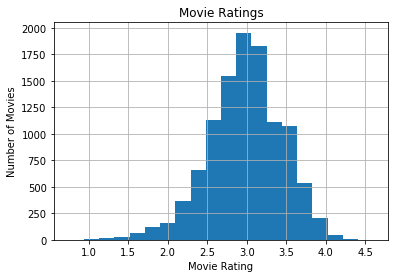

In [120]:
# Plotting the rating for the movies in a histogram.
df['rating'].hist(bins=20)

plt.xlabel('Movie Rating')
plt.ylabel('Number of Movies')
plt.title('Movie Ratings')

plt.show()

If your histograms appear strange or counter-intuitive, make appropriate adjustments in the data and re-visualize. Remember that we might still need to some cleaning...

## 2. Movie runtime
The average runtime appears to be around 80 to 90 minutes. Further data cleaning was applied as the movie runtimes had certain outliers (e.g. duration of 0 or 900). Therefore, we examine only values between 20 and 300 minutes - within the reasonable. The plot has been labelled accordingly.

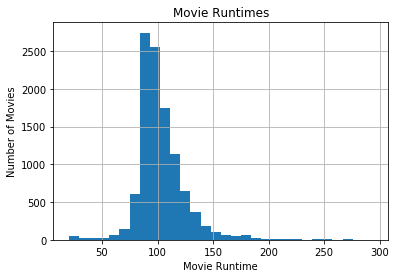

In [121]:
# Plotting the runtime for the movies in a histogram. Further preprocessing is applied.

movie_runtimes_no_outliers = df[df['runtime'].isin(range(20, 300))]

movie_runtimes_no_outliers['runtime'].hist(bins=30)

plt.xlabel('Movie Runtime')
plt.ylabel('Number of Movies')
plt.title('Movie Runtimes')

plt.show()

## Part 4: Basic associations

After we have inspected the individual values, it's time to start checking combinations of events, e.g. does the rating correlate with the budget or the revenue? Does the budget correlate with revenue? Analyze what your findings mean


---

In [122]:
# Correlation between rating and budget

print('Correlation between rating and budget:')
print(df['rating'].corr(df['budget']))

Correlation between rating and budget:
0.05987409457676032


In [123]:
# Correlation between rating and revenue

print('Correlation between rating and revenue:')
print(df['rating'].corr(df['revenue']))

Correlation between rating and revenue:
0.11808274955140435


In [124]:
# Correlation between revenue and budget

print('Correlation between revenue and budget:')
print(df['revenue'].corr(df['budget']))

Correlation between revenue and budget:
0.640891822030312


In [125]:
# Correlation between rating and user votes

print('Correlation between rating and user votes:')
print(df['rating'].corr(df['users_voted']))

Correlation between rating and user votes:
0.25379461944238174


In [126]:
# Correlation between revenue and user votes

print('Correlation between revenue and user votes:')
print(df['revenue'].corr(df['users_voted']))

Correlation between revenue and user votes:
0.7151511544606605


In [127]:
# Correlation between budget and user votes

print('Correlation between budget and user votes:')
print(df['budget'].corr(df['users_voted']))

Correlation between budget and user votes:
0.54786950503761


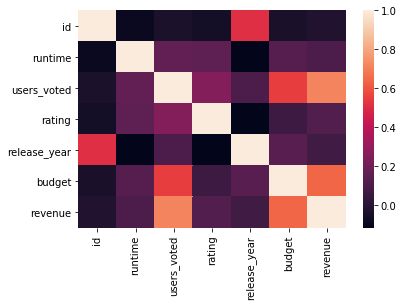

In [128]:
# Better way of computing and also visualizing correlation within a given dataframe.

corr = df.corr()

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Conclusions:
#### Correlation results (ordered from highest to lowest):
1. User votes and revenue $ \approx $ 0.715
2. Revenue and budget $ \approx $ 0.641
3. Budget and user votes $ \approx $ 0.548
4. Rating and user votes $ \approx $ 0.254
5. Rating and revenue $ \approx $ 0.118
6. Rating and budget $ \approx $ 0.06

If we also observe the plot, we can depict the exact same information. The only additional relatively strong correlation is between the id and release year. This is normal since the database has probaly been filled in sequentially. Therefore, the year was increasing as well as the autoincrementing id. There is not much more that one could infer by this correlation.


## Part 5:  Determining the Most Successful Movies 

This is an example of an analysis of the "grouped property" type.

Think of some reasonable definitions of what it could mean to be a "most successful movie", e.g. could be the movie that brought more income (that is revenue reduced by the budget) or could be the highest rated movies.


---

For example, we can determine the "best successful" movie by year! Determine the best movie in each year.

## Here 'most successful movie' means 'the movie with the highest revenue'.
Comment: The revenue often reflects the popularity of the movie in the beginning as it outlines the ticket and franchise sales rather accurately.

In [129]:
for release_year, subset in df.groupby('release_year'):
    #Find the best movie of the year
    
    print('Best movie in year ' + str(release_year) + ': ' + df.loc[subset['revenue'].idxmax()]['title'])

Best movie in year 1960: Let's Make Love
Best movie in year 1961: One Hundred and One Dalmatians
Best movie in year 1962: Lolita
Best movie in year 1963: The Sword in the Stone
Best movie in year 1964: Goldfinger
Best movie in year 1965: The Sound of Music
Best movie in year 1966: How the Grinch Stole Christmas!
Best movie in year 1967: The Jungle Book
Best movie in year 1968: Night of the Living Dead
Best movie in year 1969: Butch Cassidy and the Sundance Kid
Best movie in year 1970: Love Story
Best movie in year 1971: Diamonds Are Forever
Best movie in year 1972: The Godfather
Best movie in year 1973: The Exorcist
Best movie in year 1974: Blazing Saddles
Best movie in year 1975: Jaws
Best movie in year 1976: A Star Is Born
Best movie in year 1977: Star Wars
Best movie in year 1978: Superman
Best movie in year 1979: Moonraker
Best movie in year 1980: The Empire Strikes Back
Best movie in year 1981: Raiders of the Lost Ark
Best movie in year 1982: E.T. the Extra-Terrestrial
Best movie 

Try this for few other definitions of the "best book" using `.groupby`. Comment on the analysis (also use common sense)

## Here 'most successful movie' means 'the movie with the highest rating'.
Comment: Solely the rating represents the user's perception of the movie. They might have had a lot of enthusiasm before the movie but still be disappointed after watching it (the other way around is also possible).

In [130]:
for release_year, subset in df.groupby('release_year'):
    #Find the best movie of the year
    
    print('Best movie in year ' + str(release_year) + ': ' + df.loc[subset['rating'].idxmax()]['title'])

Best movie in year 1960: Psycho
Best movie in year 1961: One, Two, Three
Best movie in year 1962: To Kill a Mockingbird
Best movie in year 1963: Charade
Best movie in year 1964: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb
Best movie in year 1965: A Charlie Brown Christmas
Best movie in year 1966: Winnie the Pooh and the Honey Tree
Best movie in year 1967: Bonnie and Clyde
Best movie in year 1968: 2001: A Space Odyssey
Best movie in year 1969: Kes
Best movie in year 1970: Gimme Shelter
Best movie in year 1971: A Clockwork Orange
Best movie in year 1972: The Godfather
Best movie in year 1973: The Sting
Best movie in year 1974: The Godfather: Part II
Best movie in year 1975: One Flew Over the Cuckoo's Nest
Best movie in year 1976: Taxi Driver
Best movie in year 1977: Star Wars
Best movie in year 1978: The Last Waltz
Best movie in year 1979: Apocalypse Now
Best movie in year 1980: The Empire Strikes Back
Best movie in year 1981: Queen - Rock Montreal
Best movie in 

## Part 6:  Trends in Popularity of Genres 

This is an example of an analysis of the "grouped property" type.

There are a lot of questions you could ask about genres.
* Which genre is currently the most popular?
* Do you reach the same conclusions if you use as indication of popularity the revenue or the rating?
* Better, based on our data, what conclusions can you draw about the time evolution of the popularity of each genre?


---

First we need to find the distinct genres in the dataframe. 

To do this, notice that each string is a pipe (|) separated list of genres. For each string, we ask if the genre is in that pipe separated list.  If it is, we return True, else False

**Hint: remember that python sets have unique (non-repeating) items.**

In [131]:
#Get the unique genres contained in the dataframe.

genres = set()

for idx, movie in df.iterrows():
    for genre in movie['genres'].split('|'):
        genres.add(genre)
    
print(genres)

{'Comedy', 'Family', 'Drama', 'Action', 'Western', 'Thriller', 'History', 'War', 'Science Fiction', 'Animation', 'Crime', 'TV Movie', 'Romance', 'Documentary', 'Fantasy', 'Unidentified', 'Mystery', 'Horror', 'Adventure', 'Music', 'Foreign'}


What happens if we add a column to the dataframe for each genre? 

Is this way of representing genre efficient? Allows for easy computation and visualization?

Are there other ways to represent genre information in the dataframe that allow for each visualization?

In [132]:
#Add a column for each genre

for genre in genres:
    df[genre] = df['genres'].str.contains(genre)

print('Dataframe shape:')
df.shape

df.head(5)

Dataframe shape:


,id,title,cast,director,runtime,genres,release_date,users_voted,rating,release_year,budget,revenue,Comedy,Family,Drama,Action,Western,Thriller,History,War,Science Fiction,Animation,Crime,TV Movie,Romance,Documentary,Fantasy,Unidentified,Mystery,Horror,Adventure,Music,Foreign
0,135397,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,06/09,5562,3.25,2015,150000000,1513528810,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
1,76341,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,05/13,6185,3.55,2015,150000000,378436354,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
2,262500,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,03/18,2480,3.15,2015,110000000,295238201,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
3,140607,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15,5292,3.75,2015,200000000,2068178225,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False
4,168259,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,04/01,2947,3.65,2015,190000000,1506249360,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


## Answer:
We can add a column for each gene in the dataframe. The type of each of these columns will be boolean and they will model whether certain movie has this particular genre. This representaion allows for faster access to movies of specific genres. However, if we only want to list the genes, we could access only the initial column 'genres'. This is why we still leave it in the dataframe despite keeping duplicate information. This new representations also gives easier ways for visualizing the data. There isn't any better way for remodelling the genres column, so that it allows for quicker and easier visualization.

Now explore some ways to visualize the genres represented in the dataframe. 

For example, you might ask which is the most represented genre.

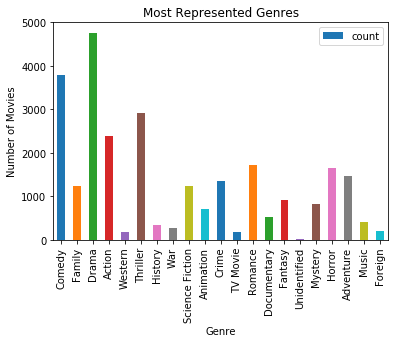

In [133]:
# Which is the most represented genre

genres_data = []
for genre in genres:
    genres_data.append([genre, df[genre].value_counts()[1]])

df_genres = pd.DataFrame(genres_data, columns=['name', 'count'])
df_genres.plot.bar(x='name', y='count')

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Most Represented Genres')

plt.show()

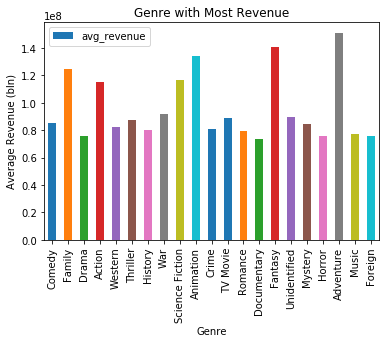

In [134]:
# Which genres bring the most revenue

genres_revenue = []
for genre in genres:
    genres_revenue.append([genre, df[df[genre] == True]['revenue'].mean()])

df_genres_revenue = pd.DataFrame(genres_revenue, columns=['name', 'avg_revenue'])
df_genres_revenue.plot.bar(x='name', y='avg_revenue')

plt.xlabel('Genre')
plt.ylabel('Average Revenue (bln)')
plt.title('Genre with Most Revenue')

plt.show()

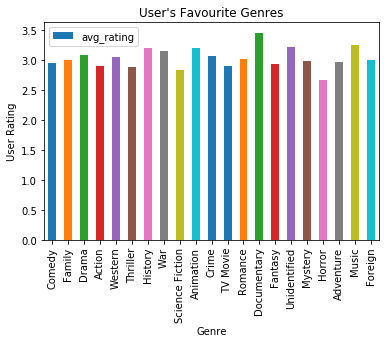

In [135]:
# Which genres are user's favourite

genres_rating = []
for genre in genres:
    genres_rating.append([genre, df[df[genre] == True]['rating'].mean()])

df_genres_rating = pd.DataFrame(genres_rating, columns=['name', 'avg_rating'])
df_genres_rating.plot.bar(x='name', y='avg_rating')

plt.xlabel('Genre')
plt.ylabel('User Rating')
plt.title('User\'s Favourite Genres')

plt.show()

### Part 6.1: What can you conclude from the above visualizations?

Pick two or three genres and describe how the popularity of these genres fluctuates with time.  

In [136]:
# We pick 3 genres: Adventure, Drama and Fantasy

adventure_Y = []
drama_Y = []
fantasy_Y = []
X = []

for release_year, subset in df.groupby('release_year'):
    X.append(release_year)
    
    adventure_Y.append(df[(df['Adventure'] == True) & (df['release_year'] == release_year)]['id'].count())
    
    drama_Y.append(df[(df['Drama'] == True) & (df['release_year'] == release_year)]['id'].count())
    
    fantasy_Y.append(df[(df['Fantasy'] == True) & (df['release_year'] == release_year)]['id'].count())

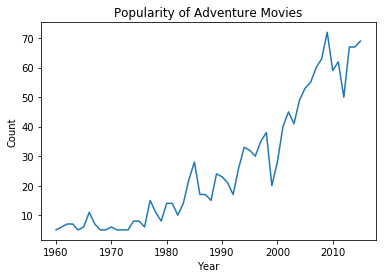

In [137]:
# Plotting the popularity of Adventure movies (1960 - 2015)

plt.plot(X, adventure_Y)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity of Adventure Movies')

plt.show()

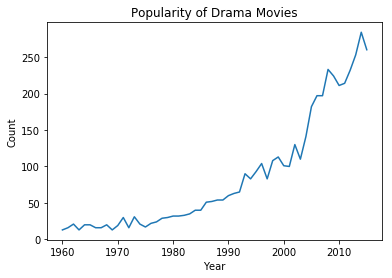

In [138]:
# Plotting the popularity of Drama movies (1960 - 2015)

plt.plot(X, drama_Y)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity of Drama Movies')

plt.show()

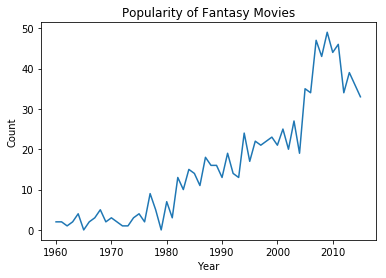

In [139]:
# Plotting the popularity of Fantasy movies (1960 - 2015)

plt.plot(X, fantasy_Y)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Popularity of Fantasy Movies')

plt.show()

## Answer:
We pick the fantasy, adventure and drama genres. Our popularity metric in this case would be the number of movies with the respective genre in each year (coming from the fact that if the genre is more popular, there would be a high demand and eventually more movies of that same genre). Overall, the number of movies (or their popularity) increases with time. However, there exist several interesting fluctuations on the graphs. The drama genre appears to be steadily increasing and directors keep on making such movies with the same fast pace. There are two major drops in the number of adventure movies in 2000 and in 2012. Nevertheless, this genre is currently at its best in terms of popularity. Contrary to the last two, the fantasy genre appears to be less popular currently compared to its peak popularity between 2005 to 2010.

## Part 7: Conclusions

### 7.1 Limitations
Are there any specific limitations in this dataset? Can we consider it complete? Is it noisy? Are there any ethical concerns?

### Answer:
There are limitations to the datasets. However, they are not that significant overall and could be fixed after applying some techniques:
1. There was the problem with the date format that we tackled by converting the string to date and changing to one uniform format for all release_dates.
2. The release year was a duplicate feature, so we removed it from the release_date column as it had its own one - release_year.
3. There were plenty of missing values regarding cast, director and genres - we changed that by substituting with an appropriate token.
4. There were few missing values for the rating that were set to the average rating of all movies - the mean.
5. When examining the duration/runtime of the movie, there were several significant outliers - 0mins duration, 900mins duration, etc. We fixed that by omitting them in the process of calculating statistics or visualizations.
6. There were only 20 different genres, so we managed to split the genres column into 20 separate ones. This allowed for better access, verification and visualization of specific genres characteristics. This also made it a lot easier to check the popularity of genres over time.

Overall, we can consider the dataset complete as there were only few spots with missing data. Also, there were some outliers in the data and that introduced some noise to the dataframe when visualizing. With regards to the ethical concerns, there should not be any sensitive information in the dataset, so no apparent ethical issues are present.

### 7.2 Main findings

### Answer:
1. We managed to clean the data - substitute missing values, disregard outliers, verify the data types and dimensions, provide a single date format for the entire dataframe based on certain observations and more.
2. Then, we proceeded with gathering statistical measurements. We described the quantative columns by their mean, standard deviation, min and max values, the percentiles and more.
3. Following, we plotted the distribution for movie rating and movie runtimes (without outliers).
4. We defined two ways of measuring 'the most successful movie' for each year and we presented that.
5. The dataframe was remodelled to allow for quicker and more efficient way to deal with genre queries.
6. We computed the correlation between most of the important quantative variables in the dataset. The visualized plot showed a quicker way of getting an idea of which columns have higher association without having to compute the score for each pair. The results showed that the number of user votes, the movie revenue and the movie budget are highly positively correlated.
7. Several statistics featuring genre queries were computed and visualized: the most represented genres are Thriller, Comedy and Drama; Fantasy, Animation and Adventure movies bring the most revenue; The documentary movies are the user's favourite genre.
8. At the end, we visualized the popularity of the adventure, drama and fantasy movies based on the number of movies each year (1960 - 2015). There were getting increasingly popular but compared to 2015, the fantasy movies started losing the pace. Out of all three genres, the drama one appears to have an effortless road ahead with continuous steady increase. The adventure genre had its ups and downs throughout the years, but it's close to its peak (as of 2015).